In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


In [4]:
print("Number of Features",len(X[0]))
print("Printing 1st row",X[0])

Number of Features 10
Printing 1st row [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error on Validation Set: {mse}")


NameError: name 'X_train' is not defined

In [ ]:
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Test Set: {mse_test}")

Mean Squared Error on Test Set: 2781.052475588295


#Cross Validation

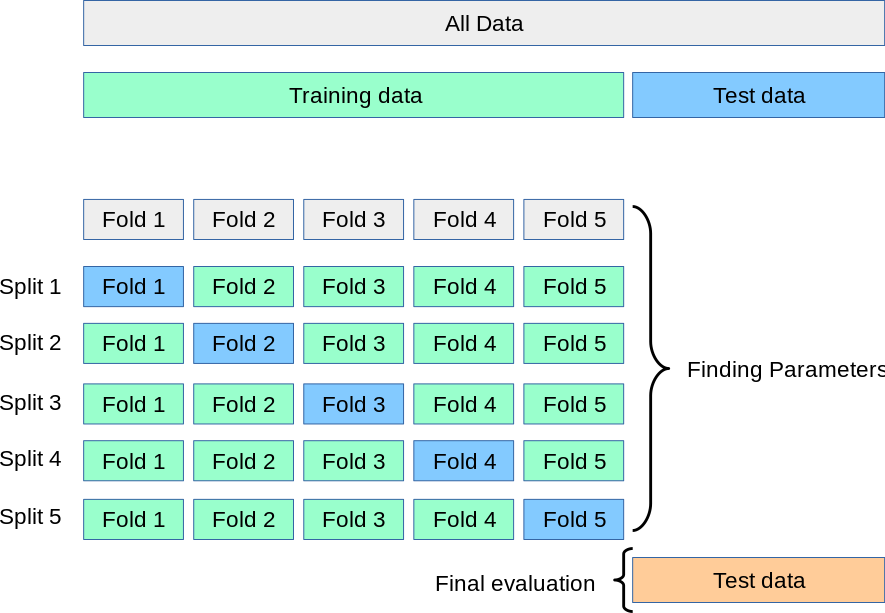

In [6]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = LinearRegression()

for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model.fit(X_train_fold, y_train_fold)
    y_val_pred_fold = model.predict(X_val_fold)

    mse_fold = mean_squared_error(y_val_fold, y_val_pred_fold)
    print(f"Fold {fold + 1}: Mean Squared Error on Validation Set: {mse_fold}")


y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"\nMean Squared Error on Test Set: {mse_test}")


Fold 1: Mean Squared Error on Validation Set: 3121.525722333602
Fold 2: Mean Squared Error on Validation Set: 2595.0031649549887
Fold 3: Mean Squared Error on Validation Set: 3656.5018037497516
Fold 4: Mean Squared Error on Validation Set: 3323.984851387648
Fold 5: Mean Squared Error on Validation Set: 3450.9782556602718

Mean Squared Error on Test Set: 2862.6053473321704


Val Index for fold 0 [  3   5   7   9  17  24  25  33  42  45  46  57  60  63  73  75  76  77
  82  84  92  93 101 104 108 113 114 119 137 145 155 158 163 164 168 173
 179 181 184 195 196 197 198 206 210 224 226 230 239 242 244 251 259 274
 284 286 288 289 295 297 301 306]
Val Index for fold 1 [  6  10  15  16  18  19  22  30  31  37  55  56  59  66  67  68  69  72
  78  79  86  90  96  97 109 111 116 118 124 126 132 139 140 144 146 147
 148 152 154 157 167 172 182 183 202 203 208 223 234 237 238 240 247 250
 258 260 262 273 277 278 287 298]
Val Index for fold 2 [  2  12  28  29  35  38  41  51  65  74  83  85  89  95 107 112 115 117
 120 125 127 129 131 133 136 142 143 159 165 170 175 176 177 178 180 185
 186 193 194 204 209 218 219 222 225 228 229 232 233 245 246 254 256 261
 267 279 282 285 290 292 294 304]
Val Index for fold 3 [  0   4   8  11  23  26  27  32  36  39  40  44  61  62  64  70  81  98
 100 103 110 122 123 128 135 138 141 150 153 156 162 171 192 199 200 207
 211 212 21

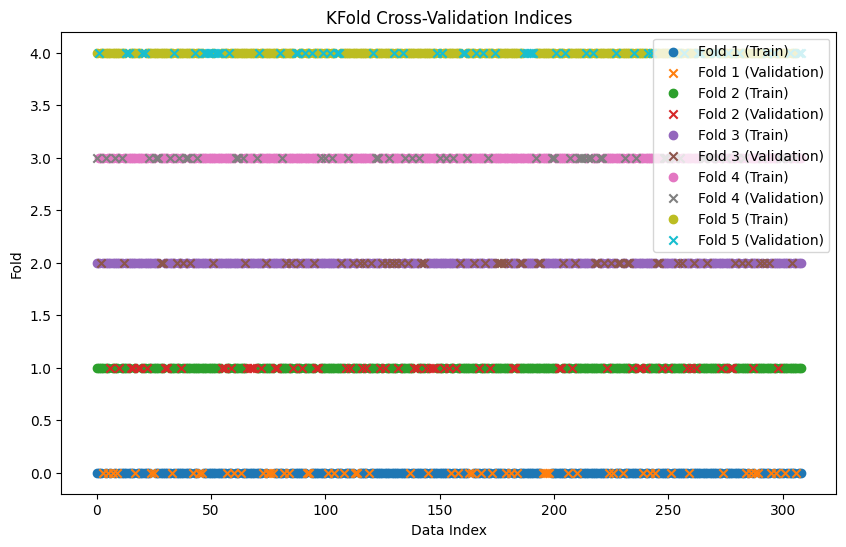

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Plot the indices for each fold
fig, ax = plt.subplots(figsize=(10, 6))

for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    ax.scatter(train_index, [fold] * len(train_index), label=f'Fold {fold + 1} (Train)', marker='o')
    ax.scatter(val_index, [fold] * len(val_index), label=f'Fold {fold + 1} (Validation)', marker='x')
    #print(f"Train Index for fold {fold}", train_index )
    print(f"Val Index for fold {fold}", val_index )
ax.set_xlabel('Data Index')
ax.set_ylabel('Fold')
ax.set_title('KFold Cross-Validation Indices')
ax.legend()
plt.show()


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

california_housing = fetch_california_housing()
X_california = california_housing.data
y_california = california_housing.target

print("California Housing Dataset:")
print(f"X_train shape: {X_california.shape}, y_train shape: {X_california.shape}")


California Housing Dataset:
X_train shape: (20640, 8), y_train shape: (20640, 8)


#Lab Task
Reimplement the above lab on the California Housing dataset.